In [1]:
# Análisis de Variabilidad de la Variable Final Weight (fnlwgt)
# Dataset: Adult Census Income

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("=== ANÁLISIS DE VARIABILIDAD DE FINAL WEIGHT (FNLWGT) ===")
print("Dataset: Adult Census Income")
print("=" * 60)


=== ANÁLISIS DE VARIABILIDAD DE FINAL WEIGHT (FNLWGT) ===
Dataset: Adult Census Income


In [2]:
# 1. CARGAR Y EXPLORAR LOS DATOS

# Definir los nombres de las columnas según la documentación
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Cargar el dataset
data_path = '../datos/adult.data'
df = pd.read_csv(data_path, names=column_names, na_values='?', skipinitialspace=True)

print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())


Dimensiones del dataset: (32561, 15)
Columnas: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Primeras 5 filas:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black 

In [3]:
# 2. EXTRAER Y LIMPIAR LA VARIABLE FNLWGT (FINAL WEIGHT)

# Extraer la variable fnlwgt
fnlwgt = df['fnlwgt'].copy()

print("=== INFORMACIÓN DE LA VARIABLE FNLWGT ===")
print(f"Tipo de dato: {fnlwgt.dtype}")
print(f"Total de observaciones: {len(fnlwgt)}")
print(f"Valores faltantes: {fnlwgt.isnull().sum()}")
print(f"Valores únicos: {fnlwgt.nunique()}")

# Verificar si hay valores faltantes o atípicos
print(f"\nValores mínimos:")
print(fnlwgt.nsmallest(5))
print(f"\nValores máximos:")
print(fnlwgt.nlargest(5))

# Estadísticas básicas
print(f"\nEstadísticas descriptivas básicas:")
print(fnlwgt.describe())


=== INFORMACIÓN DE LA VARIABLE FNLWGT ===
Tipo de dato: int64
Total de observaciones: 32561
Valores faltantes: 0
Valores únicos: 21648

Valores mínimos:
17096    12285
27207    13769
25743    14878
24012    18827
10826    19214
Name: fnlwgt, dtype: int64

Valores máximos:
14449    1484705
18138    1455435
16739    1366120
15569    1268339
8258     1226583
Name: fnlwgt, dtype: int64

Estadísticas descriptivas básicas:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


In [4]:
# 3. CÁLCULO DE MEDIDAS DE VARIABILIDAD

print("=== MEDIDAS DE VARIABILIDAD DE FNLWGT ===")
print("=" * 50)

# Medidas de tendencia central
media = fnlwgt.mean()
mediana = fnlwgt.median()
moda = fnlwgt.mode().iloc[0] if not fnlwgt.mode().empty else "No hay moda única"

print(f"MEDIDAS DE TENDENCIA CENTRAL:")
print(f"  • Media: {media:,.2f}")
print(f"  • Mediana: {mediana:,.2f}")
print(f"  • Moda: {moda:,.2f}")

# Medidas de dispersión absoluta
varianza = fnlwgt.var()
desv_estandar = fnlwgt.std()
rango = fnlwgt.max() - fnlwgt.min()
rango_intercuartil = fnlwgt.quantile(0.75) - fnlwgt.quantile(0.25)
desv_media = np.mean(np.abs(fnlwgt - media))
desv_mediana = np.mean(np.abs(fnlwgt - mediana))

print(f"\nMEDIDAS DE DISPERSIÓN ABSOLUTA:")
print(f"  • Varianza: {varianza:,.2f}")
print(f"  • Desviación estándar: {desv_estandar:,.2f}")
print(f"  • Rango: {rango:,.2f}")
print(f"  • Rango intercuartílico (IQR): {rango_intercuartil:,.2f}")
print(f"  • Desviación media: {desv_media:,.2f}")
print(f"  • Desviación mediana: {desv_mediana:,.2f}")

# Medidas de dispersión relativa
coef_variacion = (desv_estandar / media) * 100
coef_variacion_mediana = (desv_estandar / mediana) * 100

print(f"\nMEDIDAS DE DISPERSIÓN RELATIVA:")
print(f"  • Coeficiente de variación (CV): {coef_variacion:.2f}%")
print(f"  • CV respecto a la mediana: {coef_variacion_mediana:.2f}%")

# Cuartiles y percentiles
q1 = fnlwgt.quantile(0.25)
q2 = fnlwgt.quantile(0.50)  # Mediana
q3 = fnlwgt.quantile(0.75)
p10 = fnlwgt.quantile(0.10)
p90 = fnlwgt.quantile(0.90)

print(f"\nCUARTILES Y PERCENTILES:")
print(f"  • Q1 (25%): {q1:,.2f}")
print(f"  • Q2 (50% - Mediana): {q2:,.2f}")
print(f"  • Q3 (75%): {q3:,.2f}")
print(f"  • P10: {p10:,.2f}")
print(f"  • P90: {p90:,.2f}")


=== MEDIDAS DE VARIABILIDAD DE FNLWGT ===
MEDIDAS DE TENDENCIA CENTRAL:
  • Media: 189,778.37
  • Mediana: 178,356.00
  • Moda: 123,011.00

MEDIDAS DE DISPERSIÓN ABSOLUTA:
  • Varianza: 11,140,797,791.84
  • Desviación estándar: 105,549.98
  • Rango: 1,472,420.00
  • Rango intercuartílico (IQR): 119,224.00
  • Desviación media: 77,608.22
  • Desviación mediana: 76,931.54

MEDIDAS DE DISPERSIÓN RELATIVA:
  • Coeficiente de variación (CV): 55.62%
  • CV respecto a la mediana: 59.18%

CUARTILES Y PERCENTILES:
  • Q1 (25%): 117,827.00
  • Q2 (50% - Mediana): 178,356.00
  • Q3 (75%): 237,051.00
  • P10: 65,716.00
  • P90: 329,054.00


In [5]:
# 4. ANÁLISIS DE FORMA DE LA DISTRIBUCIÓN

print("=== ANÁLISIS DE FORMA DE LA DISTRIBUCIÓN ===")
print("=" * 50)

# Medidas de forma
skewness = stats.skew(fnlwgt)
kurtosis = stats.kurtosis(fnlwgt)

print(f"MEDIDAS DE FORMA:")
print(f"  • Asimetría (Skewness): {skewness:.4f}")
if skewness > 0.5:
    print("    → Distribución asimétrica positiva (sesgada a la derecha)")
elif skewness < -0.5:
    print("    → Distribución asimétrica negativa (sesgada a la izquierda)")
else:
    print("    → Distribución aproximadamente simétrica")

print(f"  • Curtosis: {kurtosis:.4f}")
if kurtosis > 3:
    print("    → Distribución leptocúrtica (más puntiaguda que la normal)")
elif kurtosis < 3:
    print("    → Distribución platicúrtica (más aplanada que la normal)")
else:
    print("    → Distribución mesocúrtica (similar a la normal)")

# Test de normalidad
shapiro_stat, shapiro_p = stats.shapiro(fnlwgt.sample(min(5000, len(fnlwgt))))  # Shapiro para muestras grandes
ks_stat, ks_p = stats.kstest(fnlwgt, 'norm', args=(media, desv_estandar))

print(f"\nTESTS DE NORMALIDAD:")
print(f"  • Test de Shapiro-Wilk (muestra de 5000):")
print(f"    - Estadístico: {shapiro_stat:.4f}")
print(f"    - p-valor: {shapiro_p:.2e}")
print(f"  • Test de Kolmogorov-Smirnov:")
print(f"    - Estadístico: {ks_stat:.4f}")
print(f"    - p-valor: {ks_p:.2e}")

if shapiro_p < 0.05:
    print("    → Los datos NO siguen una distribución normal (p < 0.05)")
else:
    print("    → Los datos podrían seguir una distribución normal (p ≥ 0.05)")

# Detección de outliers usando IQR
Q1 = fnlwgt.quantile(0.25)
Q3 = fnlwgt.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = fnlwgt[(fnlwgt < limite_inferior) | (fnlwgt > limite_superior)]
porcentaje_outliers = (len(outliers) / len(fnlwgt)) * 100

print(f"\nDETECCIÓN DE OUTLIERS (Método IQR):")
print(f"  • Límite inferior: {limite_inferior:,.2f}")
print(f"  • Límite superior: {limite_superior:,.2f}")
print(f"  • Número de outliers: {len(outliers)}")
print(f"  • Porcentaje de outliers: {porcentaje_outliers:.2f}%")


=== ANÁLISIS DE FORMA DE LA DISTRIBUCIÓN ===
MEDIDAS DE FORMA:
  • Asimetría (Skewness): 1.4469
    → Distribución asimétrica positiva (sesgada a la derecha)
  • Curtosis: 6.2177
    → Distribución leptocúrtica (más puntiaguda que la normal)

TESTS DE NORMALIDAD:
  • Test de Shapiro-Wilk (muestra de 5000):
    - Estadístico: 0.9221
    - p-valor: 4.16e-45
  • Test de Kolmogorov-Smirnov:
    - Estadístico: 0.0904
    - p-valor: 7.21e-232
    → Los datos NO siguen una distribución normal (p < 0.05)

DETECCIÓN DE OUTLIERS (Método IQR):
  • Límite inferior: -61,009.00
  • Límite superior: 415,887.00
  • Número de outliers: 992
  • Porcentaje de outliers: 3.05%


=== CREANDO VISUALIZACIONES ===


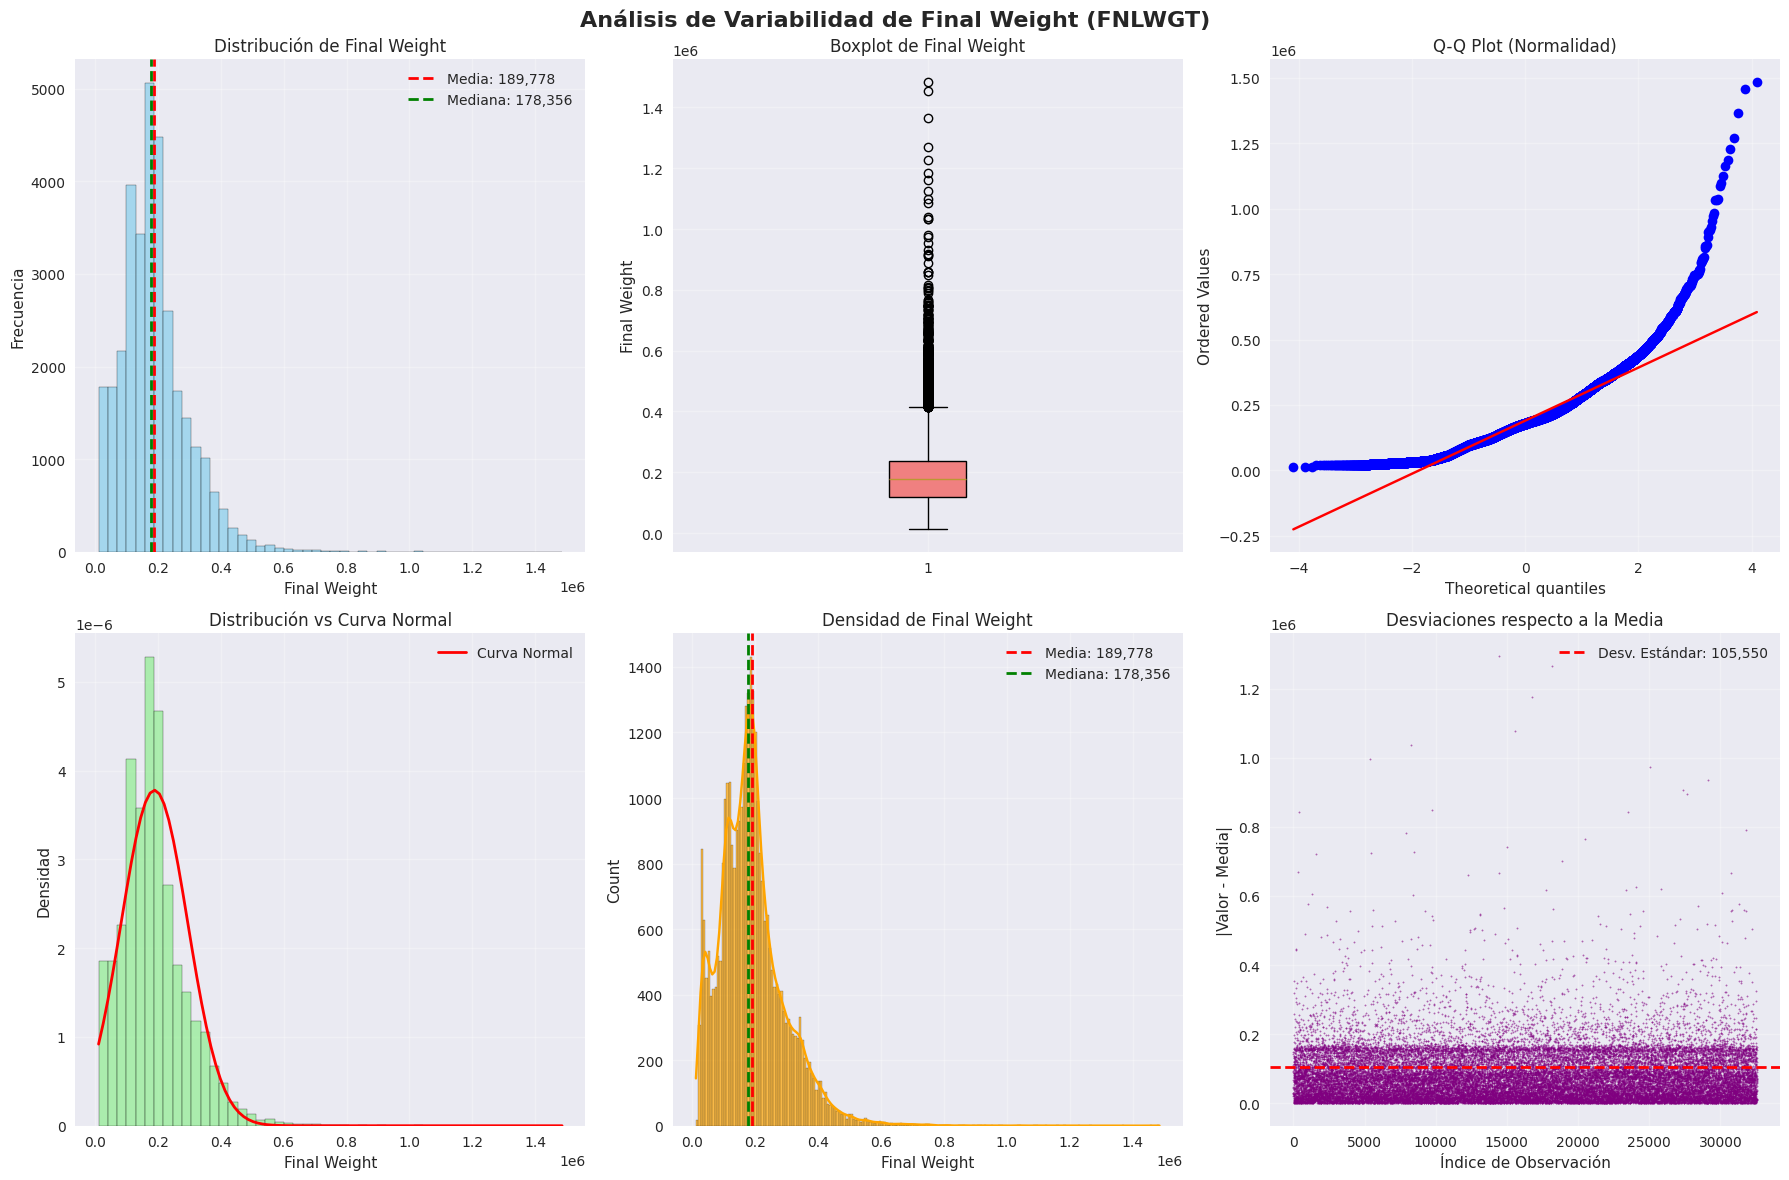

✓ Visualizaciones creadas exitosamente


In [6]:
# 5. VISUALIZACIONES DE LA VARIABILIDAD

print("=== CREANDO VISUALIZACIONES ===")
print("=" * 40)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Variabilidad de Final Weight (FNLWGT)', fontsize=16, fontweight='bold')

# 1. Histograma
axes[0, 0].hist(fnlwgt, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:,.0f}')
axes[0, 0].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:,.0f}')
axes[0, 0].set_title('Distribución de Final Weight')
axes[0, 0].set_xlabel('Final Weight')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot
box_plot = axes[0, 1].boxplot(fnlwgt, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
axes[0, 1].set_title('Boxplot de Final Weight')
axes[0, 1].set_ylabel('Final Weight')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot
stats.probplot(fnlwgt, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot (Normalidad)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Histograma con curva normal superpuesta
axes[1, 0].hist(fnlwgt, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
x = np.linspace(fnlwgt.min(), fnlwgt.max(), 100)
normal_curve = stats.norm.pdf(x, media, desv_estandar)
axes[1, 0].plot(x, normal_curve, 'r-', linewidth=2, label='Curva Normal')
axes[1, 0].set_title('Distribución vs Curva Normal')
axes[1, 0].set_xlabel('Final Weight')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Gráfico de densidad
sns.histplot(fnlwgt, kde=True, ax=axes[1, 1], color='orange', alpha=0.7)
axes[1, 1].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:,.0f}')
axes[1, 1].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:,.0f}')
axes[1, 1].set_title('Densidad de Final Weight')
axes[1, 1].set_xlabel('Final Weight')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Gráfico de variabilidad (desviaciones)
desviaciones = np.abs(fnlwgt - media)
axes[1, 2].scatter(range(len(desviaciones)), desviaciones, alpha=0.5, s=1, color='purple')
axes[1, 2].axhline(desv_estandar, color='red', linestyle='--', linewidth=2, label=f'Desv. Estándar: {desv_estandar:,.0f}')
axes[1, 2].set_title('Desviaciones respecto a la Media')
axes[1, 2].set_xlabel('Índice de Observación')
axes[1, 2].set_ylabel('|Valor - Media|')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizaciones creadas exitosamente")


In [7]:
# 6. RESUMEN COMPLETO Y TABLA DE ESTADÍSTICAS

print("=== RESUMEN COMPLETO DE VARIABILIDAD ===")
print("=" * 60)

# Crear DataFrame con todas las estadísticas
estadisticas = {
    'Medida': [
        'Media', 'Mediana', 'Moda', 'Desv. Estándar', 'Varianza',
        'Coef. Variación (%)', 'Rango', 'IQR', 'Asimetría', 'Curtosis',
        'Mínimo', 'Máximo', 'Q1', 'Q3', 'P10', 'P90',
        'Outliers (IQR)', 'Outliers (%)'
    ],
    'Valor': [
        f"{media:,.2f}", f"{mediana:,.2f}", f"{moda:,.2f}",
        f"{desv_estandar:,.2f}", f"{varianza:,.2f}",
        f"{coef_variacion:.2f}", f"{rango:,.2f}", f"{rango_intercuartil:,.2f}",
        f"{skewness:.4f}", f"{kurtosis:.4f}",
        f"{fnlwgt.min():,.2f}", f"{fnlwgt.max():,.2f}",
        f"{q1:,.2f}", f"{q3:,.2f}", f"{p10:,.2f}", f"{p90:,.2f}",
        f"{len(outliers)}", f"{porcentaje_outliers:.2f}"
    ]
}

df_estadisticas = pd.DataFrame(estadisticas)
print("\nTABLA DE ESTADÍSTICAS COMPLETA:")
print(df_estadisticas.to_string(index=False))

# Interpretación de la variabilidad
print(f"\n=== INTERPRETACIÓN DE LA VARIABILIDAD ===")
print("=" * 50)

print(f"📊 NIVEL DE VARIABILIDAD:")
if coef_variacion < 15:
    nivel = "BAJA"
    color = "🟢"
elif coef_variacion < 35:
    nivel = "MODERADA"
    color = "🟡"
else:
    nivel = "ALTA"
    color = "🔴"

print(f"{color} Coeficiente de Variación: {coef_variacion:.2f}% → Variabilidad {nivel}")

print(f"\n📈 FORMA DE LA DISTRIBUCIÓN:")
if skewness > 0.5:
    forma = "Asimétrica positiva (sesgada a la derecha)"
elif skewness < -0.5:
    forma = "Asimétrica negativa (sesgada a la izquierda)"
else:
    forma = "Aproximadamente simétrica"

print(f"   • {forma} (Skewness: {skewness:.4f})")

if kurtosis > 3:
    curtosis_desc = "Leptocúrtica (más puntiaguda que la normal)"
elif kurtosis < 3:
    curtosis_desc = "Platicúrtica (más aplanada que la normal)"
else:
    curtosis_desc = "Mesocúrtica (similar a la normal)"

print(f"   • {curtosis_desc} (Kurtosis: {kurtosis:.4f})")

print(f"\n🎯 CARACTERÍSTICAS PRINCIPALES:")
print(f"   • La variable presenta una variabilidad {nivel.lower()}")
print(f"   • El 50% de los datos están entre {q1:,.0f} y {q3:,.0f}")
print(f"   • El rango total es de {rango:,.0f} unidades")
print(f"   • Hay {len(outliers)} valores atípicos ({porcentaje_outliers:.1f}% del total)")

if shapiro_p < 0.05:
    print(f"   • Los datos NO siguen una distribución normal (p < 0.05)")
else:
    print(f"   • Los datos podrían seguir una distribución normal (p ≥ 0.05)")

print(f"\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)


=== RESUMEN COMPLETO DE VARIABILIDAD ===

TABLA DE ESTADÍSTICAS COMPLETA:
             Medida             Valor
              Media        189,778.37
            Mediana        178,356.00
               Moda        123,011.00
     Desv. Estándar        105,549.98
           Varianza 11,140,797,791.84
Coef. Variación (%)             55.62
              Rango      1,472,420.00
                IQR        119,224.00
          Asimetría            1.4469
           Curtosis            6.2177
             Mínimo         12,285.00
             Máximo      1,484,705.00
                 Q1        117,827.00
                 Q3        237,051.00
                P10         65,716.00
                P90        329,054.00
     Outliers (IQR)               992
       Outliers (%)              3.05

=== INTERPRETACIÓN DE LA VARIABILIDAD ===
📊 NIVEL DE VARIABILIDAD:
🔴 Coeficiente de Variación: 55.62% → Variabilidad ALTA

📈 FORMA DE LA DISTRIBUCIÓN:
   • Asimétrica positiva (sesgada a la derecha) (Ske

## 📋 Resumen del Análisis de Variabilidad

Este notebook realiza un análisis completo de la variabilidad de la variable **Final Weight (fnlwgt)** del dataset Adult Census Income.

### 🔍 **Qué se analiza:**
- **Medidas de tendencia central**: Media, mediana, moda
- **Medidas de dispersión absoluta**: Varianza, desviación estándar, rango, IQR
- **Medidas de dispersión relativa**: Coeficiente de variación
- **Forma de la distribución**: Asimetría y curtosis
- **Tests de normalidad**: Shapiro-Wilk y Kolmogorov-Smirnov
- **Detección de outliers**: Método IQR
- **Visualizaciones**: Histogramas, boxplots, Q-Q plots, gráficos de densidad

### 📊 **Interpretación de resultados:**
- **CV < 15%**: Variabilidad baja
- **CV 15-35%**: Variabilidad moderada  
- **CV > 35%**: Variabilidad alta

### 🎯 **Objetivo:**
Comprender la dispersión y distribución de los pesos finales en el censo, lo cual es importante para entender la representatividad de la muestra y la variabilidad en los datos demográficos.
